<a href="https://colab.research.google.com/github/765302995/colab_backup/blob/main/MPC_Cloud_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
!pip install cubo[ee]

  Using cached numpy-1.26.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.0
    Uninstalling numpy-2.0.0:
      Successfully uninstalled numpy-2.0.0


In [33]:
import cubo
import ee

In [35]:
ee.Authenticate()
ee.Initialize(project='ee-shijiarui4')

True

In [43]:
da = cubo.create(
    lat=47.848151988493385,
    lon=13.379491178028564,
    collection="LANDSAT/LC09/C02/T2_L2", # ID of the GEE collection
    bands=["SR_B2","SR_B3","SR_B4"], # Bands to retrieve
    start_date="2021-06-01",
    end_date="2024-06-01", # End date of the cube (remember in GEE this date is not included)
    edge_size=64,
    resolution=10,
    gee=True # Set to True
)
da

<xarray.DataArray 'LANDSAT/LC09/C02/T2_L2' (time: 13, band: 3, y: 64, x: 64)>
dask.array<transpose, shape=(13, 3, 64, 64), dtype=float32, chunksize=(13, 1, 64, 64), chunktype=numpy.ndarray>
Coordinates:
  * time                       (time) datetime64[ns] 2022-02-02T09:52:03.5060...
  * x                          (x) float64 3.784e+05 3.785e+05 ... 3.791e+05
  * y                          (y) float64 5.3e+06 5.3e+06 ... 5.301e+06
  * band                       (band) object 'SR_B2' 'SR_B3' 'SR_B4'
    cubo:distance_from_center  (y, x) float64 451.8 444.8 437.9 ... 432.1 439.1
Attributes:
    collection:           LANDSAT/LC09/C02/T2_L2
    stac:                 https://earthengine-stac.storage.googleapis.com/cat...
    epsg:                 32633
    resolution:           10
    edge_size:            64
    edge_size_m:          640
    central_lat:          47.848151988493385
    central_lon:          13.379491178028564
    central_y:            5300694.38448788
    central_x:            378764.6058600877
    time_coverage_start:  2021-06-01
    time_coverage_end:    2024-06-01

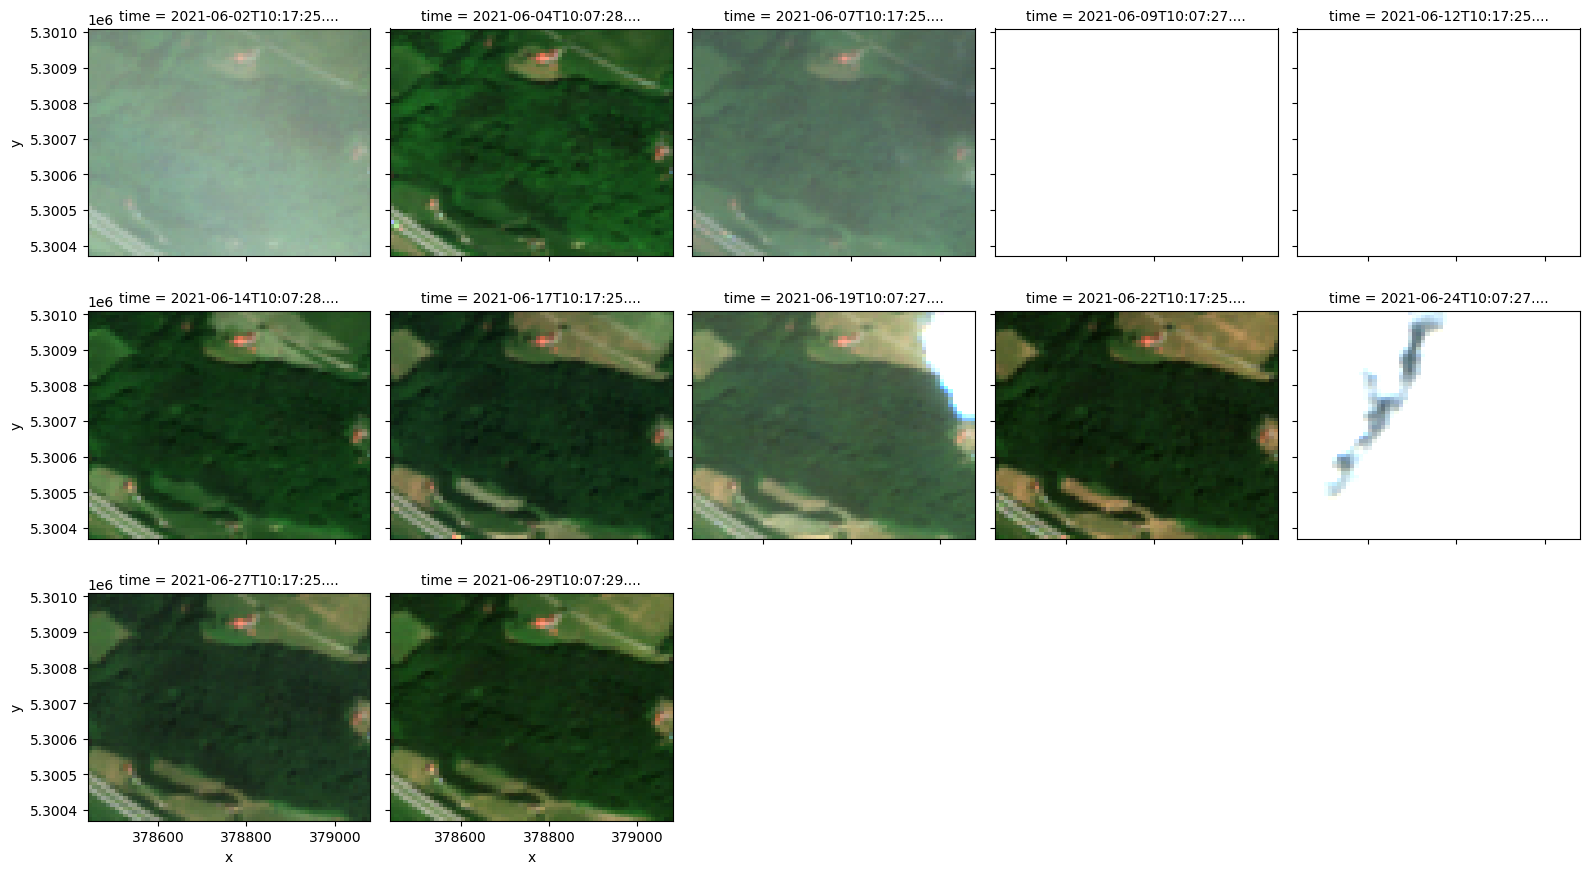

In [39]:
(da.sel(band=["B4","B3","B2"])/2000).clip(0,1).plot.imshow(col="time",col_wrap = 5)

In [34]:
# import pystac_client
# import planetary_computer
# import odc.stac
# import matplotlib.pyplot as plt

# from pystac.extensions.eo import EOExtension as eo


ModuleNotFoundError: No module named 'odc'

In [ ]:
catalog = pystac_client.Client.open(
    "https://planetarycomputer.microsoft.com/api/stac/v1",
    modifier=planetary_computer.sign_inplace,
)

In [41]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import os
meta = pd.read_csv('./drive/MyDrive/NPP/32_lake_meta_10km.csv')
meta

Mounted at /content/drive


,Unnamed: 0,lake,left_bottom_lon,left_bottom_lat,right_top_lon,right_top_lat,start_time,end_time
0,0,Acton,-84.751904,39.571318,-84.746904,39.576318,2010-04-16,2010-10-06
1,1,Annie,-81.356000,27.207000,-81.351000,27.212000,2008-02-23,2009-03-06
2,2,Bay,-89.496930,46.240670,-89.491930,46.245670,2016-05-23,2016-09-17
3,3,Brown,-89.475000,46.210000,-89.470000,46.215000,2017-05-23,2017-09-21
4,4,Castle,-122.388127,41.226927,-122.383127,41.231927,2019-06-05,2019-10-31
5,5,Crampton,-89.478300,46.210460,-89.473300,46.215460,2013-05-14,2013-09-19
6,6,Croche,-74.010117,45.992308,-74.005117,45.997308,2016-05-03,2016-10-29
7,7,Erken,18.569103,59.844674,18.574103,59.849674,2018-05-01,2018-11-13
8,8,Feeagh,-9.582300,53.949500,-9.577300,53.954500,2012-12-25,2014-01-07
9,9,FredriksburgSlotso,12.297912,55.933562,12.302912,55.938562,2006-04-04,2006-11-28


In [64]:
data_lake = pd.DataFrame()
for ii in range(len(meta)):
    lakename = meta.iloc[ii,1]
    left_bottom_lon = meta.iloc[ii,2]
    left_bottom_lat = meta.iloc[ii,3]
    right_top_lon = meta.iloc[ii,4]
    right_top_lat = meta.iloc[ii,5]
    start_time= meta.iloc[ii,6]
    end_time= meta.iloc[ii,7]
    bbox_of_interest = [  left_bottom_lon,left_bottom_lat ,    right_top_lon,   right_top_lat]
    time_of_interest = start_time+"/"+end_time

# 新段落

In [ ]:

# import numpy as np
# data_lake = pd.DataFrame()
# for ii in range(len(meta)):
#     lakename = meta.iloc[ii,1]
#     left_bottom_lon = meta.iloc[ii,2]
#     left_bottom_lat = meta.iloc[ii,3]
#     right_top_lon = meta.iloc[ii,4]
#     right_top_lat = meta.iloc[ii,5]
#     start_time= meta.iloc[ii,6]
#     end_time= meta.iloc[ii,7]
#     bbox_of_interest = [  left_bottom_lon,left_bottom_lat ,    right_top_lon,   right_top_lat]
#     time_of_interest = start_time+"/"+end_time

#     #landsat9
#     search = catalog.search(
#     collections=["landsat-c2-l2"],
#     bbox=bbox_of_interest,
#     datetime=time_of_interest,
#     query={
#         "eo:cloud_cover": {"lt": 100},
#         "platform": {"in": ["landsat-9"]},
#     }
#     )
#     items_L9 = search.item_collection()
#     data_value_L9 = pd.DataFrame(columns=['time', 'blue', 'green','red', 'nir08', 'swir16', 'swir22', "lwir11" ])
#     x_line = -1
#     y_line = -1
#     for i in items_L9:
#         bands_of_interest = ["nir08", "red", "green", "blue", "swir16","swir22", "lwir11"  ]
#         data = odc.stac.stac_load(
#             [i], bands=bands_of_interest, bbox=bbox_of_interest
#         ).isel(time=0)

#         band_info = i.assets["blue"].extra_fields["raster:bands"][0]
#         data_refence = data[["nir08", "red", "green", "blue", "swir16","swir22"]].astype(float)
#         data_refence *= band_info["scale"]
#         data_refence  += band_info["offset"]
#         temperature = data["lwir11"].astype(float)
#         temperature *= band_info["scale"]
#         temperature += band_info["offset"]


#         row_data = {"time": data_refence.time.values,
#         "blue": data_refence['blue'][x_line][y_line].values.flatten(),
#         "green": data_refence['green'][x_line][y_line].values.flatten(),
#         "red": data_refence['red'][x_line][y_line].values.flatten(),
#         "nir08": data_refence['nir08'][x_line][y_line].values.flatten(),
#         "swir16": data_refence['swir16'][x_line][y_line].values.flatten(),
#         "swir22": data_refence['swir22'][x_line][y_line].values.flatten(),
#         "lwir11" :  temperature[x_line][y_line].values.flatten()-273.15  }
#         df_rowdata = pd.DataFrame(row_data)
#         data_value_L9 = pd.concat([data_value_L9, df_rowdata], ignore_index=True)


#     #landsat8
#     search = catalog.search(
#     collections=["landsat-c2-l2"],
#     bbox=bbox_of_interest,
#     datetime=time_of_interest,
#     query={
#         "eo:cloud_cover": {"lt": 100},
#         "platform": {"in": ["landsat-8"]},
#     }
#     )
#     items_L8 = search.item_collection()
#     data_value_L8 = pd.DataFrame(columns=['time', 'blue', 'green','red', 'nir08', 'swir16', 'swir22', "lwir11" ])
#     x_line = -1
#     y_line = -1
#     for i in items_L8:
#         bands_of_interest = ["nir08", "red", "green", "blue", "swir16","swir22", "lwir11"  ]
#         data = odc.stac.stac_load(
#             [i], bands=bands_of_interest, bbox=bbox_of_interest
#         ).isel(time=0)

#         band_info = i.assets["blue"].extra_fields["raster:bands"][0]
#         data_refence = data[["nir08", "red", "green", "blue", "swir16","swir22"]].astype(float)
#         data_refence *= band_info["scale"]
#         data_refence  += band_info["offset"]
#         band_info2 = i.assets["lwir11"].extra_fields["raster:bands"][0]
#         temperature = data["lwir11"].astype(float)
#         temperature *= band_info2["scale"]
#         temperature += band_info2["offset"]


#         row_data = {"time": data_refence.time.values,
#         "blue": data_refence['blue'][x_line][y_line].values.flatten(),
#         "green": data_refence['green'][x_line][y_line].values.flatten(),
#         "red": data_refence['red'][x_line][y_line].values.flatten(),
#         "nir08": data_refence['nir08'][x_line][y_line].values.flatten(),
#         "swir16": data_refence['swir16'][x_line][y_line].values.flatten(),
#         "swir22": data_refence['swir22'][x_line][y_line].values.flatten(),
#         "lwir11" :  temperature[x_line][y_line].values.flatten()-273.15  }
#         df_rowdata = pd.DataFrame(row_data)
#         data_value_L8 = pd.concat([data_value_L8, df_rowdata], ignore_index=True)

#      #landsat7
#     search = catalog.search(
#         collections=["landsat-c2-l2"],
#         bbox=bbox_of_interest,
#         datetime=time_of_interest,
#         query={
#             "eo:cloud_cover": {"lt": 100},
#             "platform": {"in": ["landsat-7"]},
#         }
#     )

#     items_L7 = search.item_collection()
#     data_value_L7 = pd.DataFrame(columns=['time', 'blue', 'green','red', 'nir08', 'swir16', 'swir22', "lwir11"  ])

#     x_line = -1
#     y_line = -1
#     for i in items_L7:
#         bands_of_interest = ["nir08", "red", "green", "blue", "swir16","swir22", "lwir"  ]
#         data = odc.stac.stac_load(
#             [i], bands=bands_of_interest, bbox=bbox_of_interest
#         ).isel(time=0)

#         band_info = i.assets["blue"].extra_fields["raster:bands"][0]
#         data_refence = data[["nir08", "red", "green", "blue", "swir16","swir22"]].astype(float)
#         data_refence *= band_info["scale"]
#         data_refence  += band_info["offset"]
#         temperature = data["lwir"].astype(float)
#         temperature *= band_info["scale"]
#         temperature += band_info["offset"]


#         row_data = {"time": data_refence.time.values,
#         "blue": data_refence['blue'][x_line][y_line].values.flatten(),
#         "green": data_refence['green'][x_line][y_line].values.flatten(),
#         "red": data_refence['red'][x_line][y_line].values.flatten(),
#         "nir08": data_refence['nir08'][x_line][y_line].values.flatten(),
#         "swir16": data_refence['swir16'][x_line][y_line].values.flatten(),
#         "swir22": data_refence['swir22'][x_line][y_line].values.flatten(),
#         "lwir11" :  temperature[x_line][y_line].values.flatten()-273.15  }
#         df_rowdata = pd.DataFrame(row_data)
#         data_value_L7 = pd.concat([data_value_L7, df_rowdata], ignore_index=True)

#     #landsat5
#     search = catalog.search(
#         collections=["landsat-c2-l2"],
#         bbox=bbox_of_interest,
#         datetime=time_of_interest,
#         query={
#             "eo:cloud_cover": {"lt": 100},
#             "platform": {"in": ["landsat-5"]},
#         }
#     )

#     items_L5 = search.item_collection()
#     data_value_L5 = pd.DataFrame(columns=['time', 'blue', 'green','red', 'nir08', 'swir16', 'swir22', "lwir11"  ])

#     x_line = -1
#     y_line = -1
#     for i in items_L5:
#         bands_of_interest = ["nir08", "red", "green", "blue", "swir16","swir22", "lwir"  ]
#         data = odc.stac.stac_load(
#             [i], bands=bands_of_interest, bbox=bbox_of_interest
#         ).isel(time=0)

#         band_info = i.assets["blue"].extra_fields["raster:bands"][0]
#         data_refence = data[["nir08", "red", "green", "blue", "swir16","swir22"]].astype(float)
#         data_refence *= band_info["scale"]
#         data_refence  += band_info["offset"]
#         temperature = data["lwir"].astype(float)
#         temperature *= band_info["scale"]
#         temperature += band_info["offset"]


#         row_data = {"time": data_refence.time.values,
#         "blue": data_refence['blue'][x_line][y_line].values.flatten(),
#         "green": data_refence['green'][x_line][y_line].values.flatten(),
#         "red": data_refence['red'][x_line][y_line].values.flatten(),
#         "nir08": data_refence['nir08'][x_line][y_line].values.flatten(),
#         "swir16": data_refence['swir16'][x_line][y_line].values.flatten(),
#         "swir22": data_refence['swir22'][x_line][y_line].values.flatten(),
#         "lwir11" :  temperature[x_line][y_line].values.flatten()-273.15  }
#         df_rowdata = pd.DataFrame(row_data)
#         data_value_L5 = pd.concat([data_value_L5, df_rowdata], ignore_index=True)
#     data_value_L9['sensor'] = "L9"
#     data_value_L8['sensor'] = "L8"
#     # data_value_L7['sensor'] = "L7"
#     # data_value_L5['sensor'] = "L5"
#     data_value_L9_filtered = data_value_L9[(data_value_L9['swir22'] !=-0.2 ) & (data_value_L9['blue']  !=-0.2)]
#     data_value_L8_filtered = data_value_L8[(data_value_L8['swir22'] !=-0.2 ) & (data_value_L8['blue']  !=-0.2)]
#     # data_value_L7_filtered = data_value_L7[(data_value_L7['swir22'] !=-0.2 ) & (data_value_L7['blue']  !=-0.2)]
#     # data_value_L5_filtered = data_value_L5[(data_value_L5['swir22'] !=-0.2 ) & (data_value_L5['blue']  !=-0.2)]
#     combined_df = pd.concat([data_value_L9_filtered,data_value_L8_filtered], axis=0, ignore_index=True)
#     # combined_df = pd.concat([data_value_L9_filtered,data_value_L8_filtered,data_value_L7_filtered,data_value_L5_filtered], axis=0, ignore_index=True)
#     combined_df['lakename'] = lakename
#     combined_df_sorted = combined_df.sort_values(by='time', ascending=False)
#     combined_df_sorted = combined_df_sorted.reset_index(drop=True)
#     data_lake = pd.concat([data_lake,combined_df_sorted], axis=0, ignore_index=True)
# data_lake

ERROR:odc.stac._reader:Aborting load due to failure while reading: https://landsateuwest.blob.core.windows.net/landsat-c2/level-2/standard/oli-tirs/2019/016/030/LC08_L2SP_016030_20190718_20200827_02_T1/LC08_L2SP_016030_20190718_20200827_02_T1_SR_B6.TIF?st=2024-06-23T03%3A08%3A42Z&se=2024-06-24T03%3A53%3A42Z&sp=rl&sv=2024-05-04&sr=c&skoid=9c8ff44a-6a2c-4dfb-b298-1c9212f64d9a&sktid=72f988bf-86f1-41af-91ab-2d7cd011db47&skt=2024-06-23T14%3A50%3A59Z&ske=2024-06-30T14%3A50%3A59Z&sks=b&skv=2024-05-04&sig=LMZwr8qLGnNYo0AtuR/V0jTcCIAM5XklQWGsGACoCpY%3D:1


RasterioIOError: HTTP response code: 403 - Recv failure: Connection timed out

In [65]:
da = cubo.create(
    lat=47.848151988493385,
    lon=13.379491178028564,
    collection="ECMWF/ERA5_LAND/DAILY_AGGR", # ID of the GEE collection
    bands=["surface_net_solar_radiation_sum","lake_mix_layer_depth"], # Bands to retrieve
    start_date="2021-06-01",
    end_date="2024-06-01", # End date of the cube (remember in GEE this date is not included)
    edge_size=1,
    resolution=10,
    gee=True # Set to True
)
da

<xarray.DataArray 'ECMWF/ERA5_LAND/DAILY_AGGR' (time: 1096, band: 2, y: 1, x: 1)>
dask.array<transpose, shape=(1096, 2, 1, 1), dtype=float32, chunksize=(48, 1, 1, 1), chunktype=numpy.ndarray>
Coordinates:
  * time                       (time) datetime64[ns] 2021-06-01 ... 2024-05-31
  * x                          (x) float64 3.788e+05
  * y                          (y) float64 5.301e+06
  * band                       (band) object 'surface_net_solar_radiation_sum...
    cubo:distance_from_center  (y, x) float64 6.359
Attributes:
    collection:           ECMWF/ERA5_LAND/DAILY_AGGR
    stac:                 https://earthengine-stac.storage.googleapis.com/cat...
    epsg:                 32633
    resolution:           10
    edge_size:            1
    edge_size_m:          10
    central_lat:          47.848151988493385
    central_lon:          13.379491178028564
    central_y:            5300694.38448788
    central_x:            378764.6058600877
    time_coverage_start:  2021-06-01
    time_coverage_end:    2024-06-01

In [51]:
result_numpy_da = da.compute()
result_numpy_da

<xarray.DataArray 'ECMWF/ERA5_LAND/DAILY_AGGR' (time: 1096, band: 1, y: 1, x: 1)>
array([[[[25717974.]]],


       [[[23299820.]]],


       [[[25334390.]]],


       ...,


       [[[21936602.]]],


       [[[15385046.]]],


       [[[ 4152574.]]]], dtype=float32)
Coordinates:
  * time                       (time) datetime64[ns] 2021-06-01 ... 2024-05-31
  * x                          (x) float64 3.788e+05
  * y                          (y) float64 5.301e+06
  * band                       (band) object 'surface_net_solar_radiation_sum'
    cubo:distance_from_center  (y, x) float64 6.359
Attributes:
    collection:           ECMWF/ERA5_LAND/DAILY_AGGR
    stac:                 https://earthengine-stac.storage.googleapis.com/cat...
    epsg:                 32633
    resolution:           10
    edge_size:            1
    edge_size_m:          10
    central_lat:          47.848151988493385
    central_lon:          13.379491178028564
    central_y:            5300694.38448788
    central_x:            378764.6058600877
    time_coverage_start:  2021-06-01
    time_coverage_end:    2024-06-01

In [60]:
irr = result_numpy_da.to_numpy()
irr.shape
irr_re = irr.reshape(1096,-1)
irr_re

array([[25717974.],
       [23299820.],
       [25334390.],
       ...,
       [21936602.],
       [15385046.],
       [ 4152574.]], dtype=float32)

In [61]:
time1 = da.time.values

df = pd.DataFrame()
df['time'] = time1
df['irr'] = irr_re
df

,time,irr
0,2021-06-01,25717974.0
1,2021-06-02,23299820.0
2,2021-06-03,25334390.0
3,2021-06-04,23120472.0
4,2021-06-05,18998970.0
...,...,...
1091,2024-05-27,18755036.0
1092,2024-05-28,7251018.0
1093,2024-05-29,21936602.0
1094,2024-05-30,15385046.0


In [62]:
df['irr'] = df['irr']/86400
df

,time,irr
0,2021-06-01,297.661736
1,2021-06-02,269.673843
2,2021-06-03,293.222106
3,2021-06-04,267.598056
4,2021-06-05,219.895486
...,...,...
1091,2024-05-27,217.072176
1092,2024-05-28,83.923819
1093,2024-05-29,253.895856
1094,2024-05-30,178.067662


from matplotlib import pyplot as plt
df['irr'].plot(kind='hist', bins=20, title='irr')
plt.gca().spines[['top', 'right',]].set_visible(False)

AttributeError: module 'numpy.linalg._umath_linalg' has no attribute '_ilp64'

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['time']
  ys = series['irr']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('time')
_ = plt.ylabel('irr')

AttributeError: module 'numpy.linalg._umath_linalg' has no attribute '_ilp64'

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['time']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'time'}, axis=1)
              .sort_values('time', ascending=True))
  xs = counted['time']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('time')
_ = plt.ylabel('count()')

AttributeError: module 'numpy.linalg._umath_linalg' has no attribute '_ilp64'

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['time']
  ys = series['irr']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('time')
_ = plt.ylabel('irr')

AttributeError: module 'numpy.linalg._umath_linalg' has no attribute '_ilp64'

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['time']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'time'}, axis=1)
              .sort_values('time', ascending=True))
  xs = counted['time']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('time')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
df['irr'].plot(kind='line', figsize=(8, 4), title='irr')
plt.gca().spines[['top', 'right']].set_visible(False)

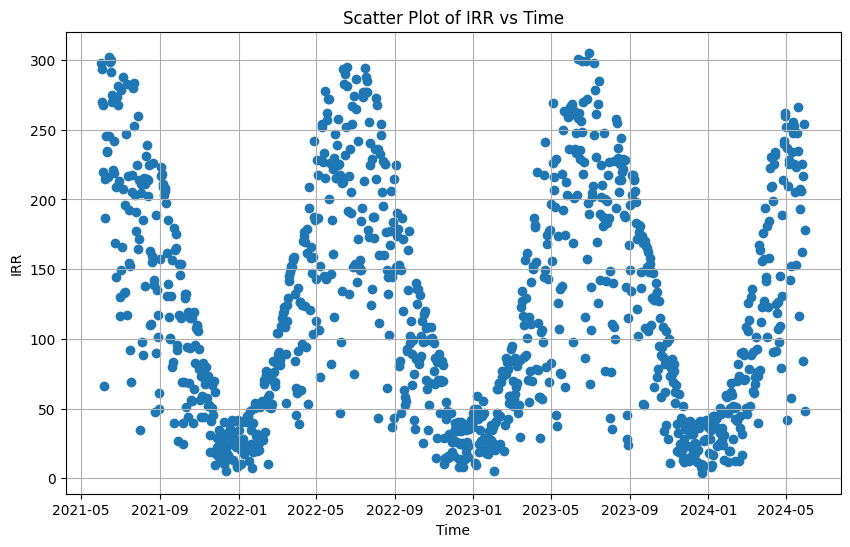

In [63]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with 'time' and 'irr' columns
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.scatter(df['time'], df['irr'])
plt.xlabel('Time')
plt.ylabel('IRR')
plt.title('Scatter Plot of IRR vs Time')
plt.grid(True)
plt.show()


In [46]:
len(da.time.values)

1096

In [49]:
import dask.array as daa
result_list = []
for i in range(da.shape[1]):
    result_slice = da[:, i, :, :] * 0.0256 + 0.7
    result_list.append(result_slice)
result_dask = daa.stack(result_list, axis=1)
print(result_dask)

dask.array<stack, shape=(1096, 1, 1, 1), dtype=float32, chunksize=(48, 1, 1, 1), chunktype=numpy.ndarray>


In [50]:
result_dask

dask.array<stack, shape=(1096, 1, 1, 1), dtype=float32, chunksize=(48, 1, 1, 1), chunktype=numpy.ndarray>

# sdas

In [66]:
da = cubo.create(
    lat=47.848151988493385,
    lon=13.379491178028564,
    collection="ECMWF/ERA5_LAND/DAILY_AGGR", # ID of the GEE collection
    bands=["surface_net_solar_radiation_sum","lake_mix_layer_depth"], # Bands to retrieve
    start_date="2021-06-01",
    end_date="2021-06-02", # End date of the cube (remember in GEE this date is not included)
    edge_size=1,
    resolution=10,
    gee=True # Set to True
)
da

<xarray.DataArray 'ECMWF/ERA5_LAND/DAILY_AGGR' (time: 1, band: 2, y: 1, x: 1)>
dask.array<transpose, shape=(1, 2, 1, 1), dtype=float32, chunksize=(1, 1, 1, 1), chunktype=numpy.ndarray>
Coordinates:
  * time                       (time) datetime64[ns] 2021-06-01
  * x                          (x) float64 3.788e+05
  * y                          (y) float64 5.301e+06
  * band                       (band) object 'surface_net_solar_radiation_sum...
    cubo:distance_from_center  (y, x) float64 6.359
Attributes:
    collection:           ECMWF/ERA5_LAND/DAILY_AGGR
    stac:                 https://earthengine-stac.storage.googleapis.com/cat...
    epsg:                 32633
    resolution:           10
    edge_size:            1
    edge_size_m:          10
    central_lat:          47.848151988493385
    central_lon:          13.379491178028564
    central_y:            5300694.38448788
    central_x:            378764.6058600877
    time_coverage_start:  2021-06-01
    time_coverage_end:    2021-06-02

In [70]:
da2_s_m=da.compute().to_numpy()
ttt2 = da2_s_m.reshape(1,2)
ttt2

array([[2.5717974e+07, 2.6751303e+01]], dtype=float32)